# Estatística descritiva

Objetivos: Analisar e descrever dados de forma a resumir suas características.

## Definições Iniciais

- População: Conjunto de todos os elementos que possuem uma característica em comum.
- Amostra: Subconjunto da população.
- Indivíduo: Elemento da população.
- Variável: Característica que pode ser medida ou contada.
- Observação: Valor de uma variável.


## Exemplo

Veremos analisaremos os dados de [Kaggle - Used Cars Details Dataset](https://www.kaggle.com/datasets/rakkesharv/used-cars-detailed-dataset).

Tabela criada a partir de dados coletados da internet a respeito de carros usados.

Vamos analisar a tabela como um todo.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
df = pd.read_csv('./dados/carros.csv')
rename = {
    'Car_Name': 'nome',
    'Make': 'marca',
    'Model': 'modelo',
    'Make_Year': 'ano',
    'Color': 'cor',
    'Body_Type': 'tipo',
    'Mileage_Run': 'quilometragem',
    'No_of_Owners': 'número de donos',
    'Seating_Capacity': 'qtd de assentos',
    'Fuel_Type': 'tipo de combustível',
    'Fuel_Tank_Capacity(L)': 'tanque (L)',
    'Engine_Type': 'tipo de motor',
    'CC_Displacement': 'cilindrada',
    'Transmission': 'transmissão',
    'Transmission_Type': 'tipo de transmissão',
    'Power(BHP)': 'potência',
    'Torque(Nm)': 'torque',
    'Mileage(kmpl)': 'consumo (km/l)',
    'Emission': 'emissão',
    'Price': 'preço'
}
df = df.dropna()
df = df.rename(columns=rename)
df = df.drop(columns=['consumo (km/l)'])
df['quilometragem'] = pd.to_numeric(
    df['quilometragem'].str.replace(',', ''), errors='raise')
df['número de donos'] = pd.to_numeric(df['número de donos'].apply(lambda x: x.replace(
    '1st', '1').replace('2nd', '2').replace('3rd', '3')), errors='raise')
df['preço'] = pd.to_numeric(df['preço'].str.replace(',', ''), errors='raise')
df


,nome,marca,modelo,ano,cor,tipo,quilometragem,número de donos,qtd de assentos,tipo de combustível,tanque (L),tipo de motor,cilindrada,transmissão,tipo de transmissão,potência,torque,emissão,preço
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,44611,1,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,BS IV,657000
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,20305,1,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,BS V,682000
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,29540,2,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,BS IV,793000
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,35680,1,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,BS IV,414000
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,25126,1,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,BS V,515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Hyundai Verna [2017-2020] 1.6 VTVT SX,Hyundai,Verna,2018,white,sedan,23869,1,5,petrol,43,Front Wheel Drive,1591,6-Speed,Automatic,121.00,158.00,BS V,956000
972,Hyundai Verna [2017-2020] 1.6 VTVT SX,Hyundai,Verna,2019,white,sedan,14831,1,5,petrol,43,Front Wheel Drive,1591,6-Speed,Automatic,121.00,158.00,BS V,1027000
973,Hyundai Verna [2011-2015] Fluidic 1.6 VTVT SX AT,Hyundai,Verna,2014,silver,sedan,52846,1,5,petrol,43,Front Wheel Drive,1591,4-Speed,Automatic,121.00,158.00,BS III,736000
974,Ford Freestyle [2020-2021] Flair Edition Diesel,Ford,Freestyle,2020,white,crossover,28335,2,5,diesel,42,1.5 litre Diesel Engine,1499,5-Speed,Automatic,98.96,215.00,BS V,749000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nome                 976 non-null    object 
 1   marca                976 non-null    object 
 2   modelo               976 non-null    object 
 3   ano                  976 non-null    int64  
 4   cor                  976 non-null    object 
 5   tipo                 976 non-null    object 
 6   quilometragem        976 non-null    int64  
 7   número de donos      976 non-null    int64  
 8   qtd de assentos      976 non-null    int64  
 9   tipo de combustível  976 non-null    object 
 10  tanque (L)           976 non-null    int64  
 11  tipo de motor        976 non-null    object 
 12  cilindrada           976 non-null    int64  
 13  transmissão          976 non-null    object 
 14  tipo de transmissão  976 non-null    object 
 15  potência             976 non-null    flo

## Mais definições

- Rol: Conjunto de dados ordenados.
- Frequência absoluta: Número de vezes que um dado aparece.
- Frequência relativa: Razão entre a frequência absoluta e o número total de dados.
- Frequência acumulada: Soma das frequências absolutas de todos os dados menores ou iguais ao dado em questão.
- Frequência relativa acumulada: Razão entre a frequência acumulada e o número total de dados.
- Dados: Valores das variáveis.
- Variáveis qualitativas: Variáveis que não podem ser medidas, apenas classificadas.
- Variáveis quantitativas: Variáveis que podem ser medidas.
- Variáveis discretas: Variáveis quantitativas que assumem valores inteiros.
- Variáveis contínuas: Variáveis quantitativas que assumem valores reais.


## Estatística descritiva

- Medidas de tendência central: Média, mediana e moda.
- Medidas de dispersão: Variância, desvio padrão, coeficiente de variação, amplitude, intervalo interquartil.

### Média

Soma dos valores dividido pelo número de valores.

No caso de estar trabalhando com uma amostra, a média é dada por:

$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

No caso de estar trabalhando com uma população, a média é dada por:

$$\mu = \frac{\sum_{i=1}^{N} x_i}{N}$$

### Mediana

Valor que divide o conjunto de dados em duas partes iguais.
Se o número de dados for par, a mediana é a média dos dois valores centrais.

Se os dados estão ordenados $x_1, x_2, \dots, x_n$, a mediana é dada por:

$$
x_{\frac{n+1}{2}} \qquad \text{se n é ímpar}
$$

$$
(x_{\frac{n}{2}} + x_{\frac{n}{2} + 1})/2 \qquad \text{se n é par}
$$

### Moda

Valor que ocorre com maior frequência.

Caso não haja um valor que ocorra com maior frequência, dizemos que a distribuição é amodal.

Caso haja mais de um valor que ocorra com maior frequência, dizemos que a distribuição é multimodal.

### Variância

Média dos quadrados das diferenças entre os valores e a média.

No caso de estar trabalhando com uma amostra, a variância é dada por:

$$s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

No caso de estar trabalhando com uma população, a variância é dada por:

$$\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}$$

### Desvio padrão

Raiz quadrada da variância.

$$s = \sqrt{s^2}$$

### Coeficiente de variação

Razão entre o desvio padrão e a média.

$$CV = \frac{s}{\bar{x}}$$

### Amplitude

Diferença entre o maior e o menor valor.

$$A = x_{max} - x_{min}$$

### Intervalo interquartil

Diferença entre o terceiro e o primeiro quartil.

$$IQR = Q_3 - Q_1$$


In [3]:
median = pd.DataFrame(df.median(numeric_only=True), columns=["median"]).T
pd.concat([df.describe(), median])


,ano,quilometragem,número de donos,qtd de assentos,tanque (L),cilindrada,potência,torque,preço
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,2016.963115,41571.195697,1.165984,5.095287,42.283811,1301.155738,91.325758,144.381045,7.410195e+05
std,2.818742,24390.995134,0.383119,0.446224,8.074549,276.867533,25.713275,66.780511,3.673234e+05
min,2011.000000,1117.000000,1.000000,4.000000,15.000000,624.000000,34.000000,48.000000,1.880000e+05
25%,2015.000000,22676.750000,1.000000,5.000000,37.000000,1197.000000,74.720000,110.000000,4.757500e+05
50%,2017.000000,37570.500000,1.000000,5.000000,42.000000,1198.000000,83.325000,114.000000,6.665000e+05
75%,2019.000000,57421.250000,1.000000,5.000000,45.000000,1497.000000,105.940000,158.000000,8.830000e+05
max,2022.000000,99495.000000,3.000000,8.000000,70.000000,2179.000000,177.000000,380.000000,2.941000e+06
median,2017.000000,37570.500000,1.000000,5.000000,42.000000,1198.000000,83.325000,114.000000,6.665000e+05


In [4]:
df.mode(axis=0, numeric_only=False)

,nome,marca,modelo,ano,cor,tipo,quilometragem,número de donos,qtd de assentos,tipo de combustível,tanque (L),tipo de motor,cilindrada,transmissão,tipo de transmissão,potência,torque,emissão,preço
0,MG Motors Hector 2.0 Sharp,Hyundai,Elite i20,2017.0,white,hatchback,6738,1.0,5.0,petrol,35.0,Kappa VTVT Petrol Engine,1197.0,5-Speed,Manual,81.8,113.0,BS IV,790000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,7122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,9242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,11762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,13185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,17246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,22538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,22801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,26653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,27053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gráficos

Exemplos de gráficos para representar a distribuição de dados.

- Histogramas: Usado para variáveis quantitativas.
  Ele é composto por retângulos adjacentes.
  A área de cada retângulo é proporcional à frequência da classe.
  A largura de cada retângulo é proporcional à amplitude da classe.
- Gráficos de barras: Usado para variáveis qualitativas.
  Eles podem ser verticais ou horizontais.
  Seu formato é semelhante ao de um histograma.
- Box Plots: Usado para variáveis quantitativas.
  Ele é composto por um retângulo e dois segmentos de reta.
  O retângulo é delimitado pelos quartis.
  Os segmentos de reta são delimitados pela amplitude.


### Histograma


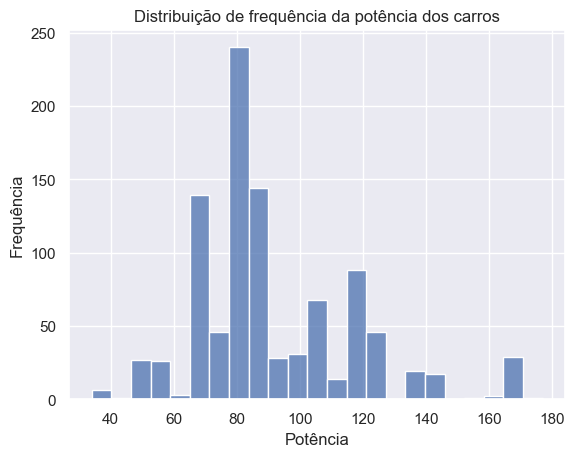

In [5]:
plot = sns.histplot(data=df['potência'])
plot.set_title('Distribuição de frequência da potência dos carros')
plot.xaxis.set_label_text('Potência')
plot.yaxis.set_label_text('Frequência')
plt.show()

### Gráfico de Barras


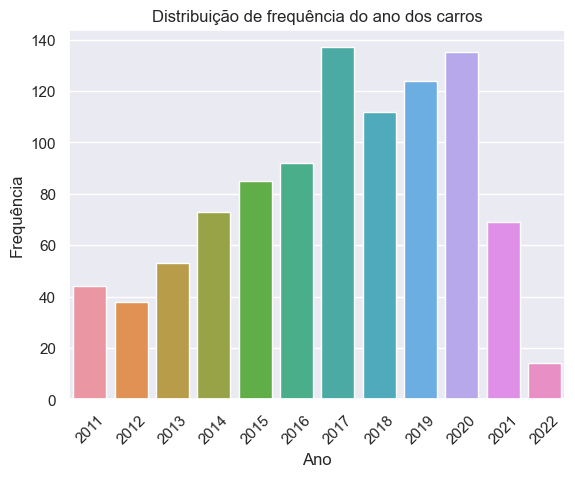

In [6]:
plot = sns.countplot(data=df, x='ano')
plot.set_title('Distribuição de frequência do ano dos carros')
plot.xaxis.set_label_text('Ano')
plot.xaxis.set_tick_params(rotation=45)
plot.yaxis.set_label_text('Frequência')
plt.show()


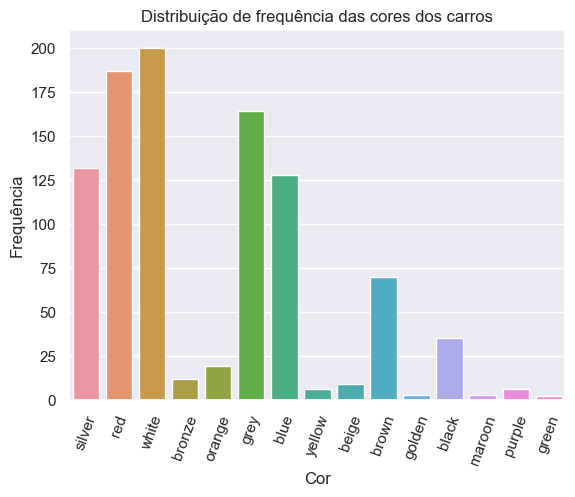

In [7]:
plot = sns.countplot(data=df, x='cor')
plot.set_title('Distribuição de frequência das cores dos carros')
plot.xaxis.set_label_text('Cor')
plot.xaxis.set_tick_params(rotation=70)
plot.yaxis.set_label_text('Frequência')
plt.show()

### Pareto

Gráfico de barras ordenado de forma decrescente.


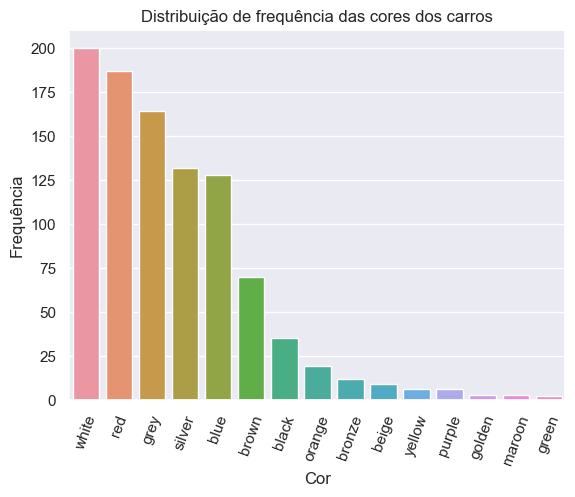

In [8]:
temp = df['cor'].value_counts()
plot = sns.barplot(x=temp.index, y=temp.values)
plot.set_title('Distribuição de frequência das cores dos carros')
plot.xaxis.set_label_text('Cor')
plot.xaxis.set_tick_params(rotation=70)
plot.yaxis.set_label_text('Frequência')
plt.show()

### Box Plot

Uma caixa com duas hastes.
A caixa é delimitada pelo primeiro e terceiro quartil.
A haste inferior é delimitada pelo primeiro quartil e o menor valor.
A haste superior é delimitada pelo terceiro quartil e o maior valor.


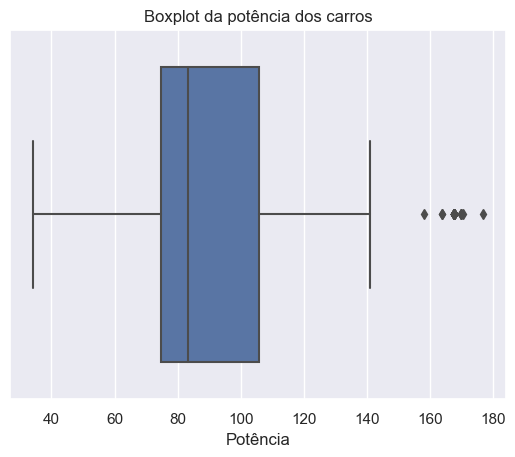

In [9]:
plot = sns.boxplot(data=df, x='potência')
plot.title.set_text('Boxplot da potência dos carros')
plot.xaxis.set_label_text('Potência')
plt.show()

Normalmente, é feito um Box Plot para cada categoria de uma variável qualitativa.


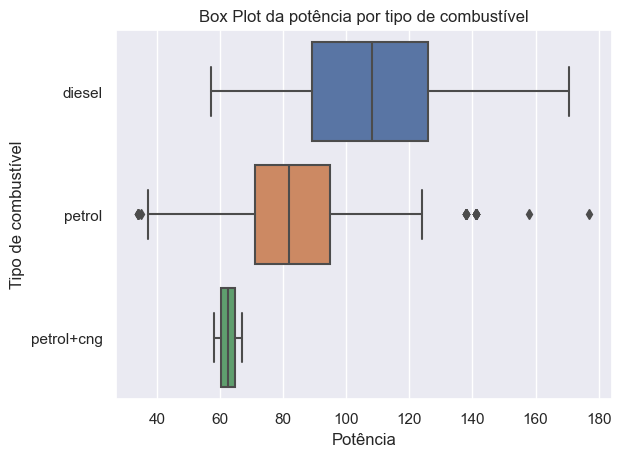

In [10]:
plot = sns.boxplot(data=df, x='potência', y='tipo de combustível')
plot.set_title('Box Plot da potência por tipo de combustível')
plot.xaxis.set_label_text('Potência')
plot.yaxis.set_label_text('Tipo de combustível')
plt.show()

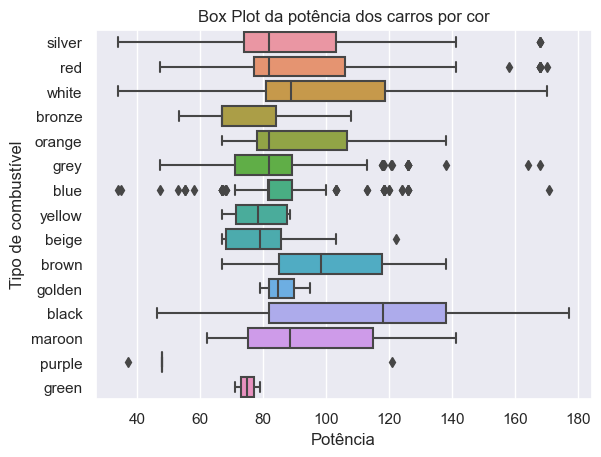

In [11]:
plot = sns.boxplot(data=df, x='potência', y='cor')
plot.title.set_text('Box Plot da potência dos carros por cor')
plot.xaxis.set_label_text('Potência')
plot.yaxis.set_label_text('Tipo de combustível')
plt.show()

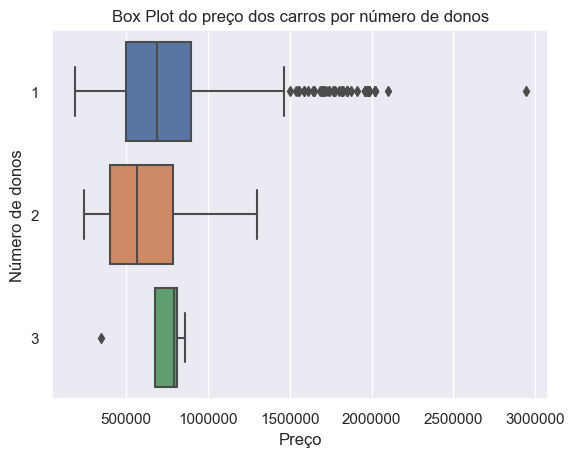

In [12]:
plot = sns.boxplot(data=df, x='preço', y='número de donos', orient="h")
plot.title.set_text('Box Plot do preço dos carros por número de donos')
plot.xaxis.set_label_text('Preço')
plot.ticklabel_format(style='plain', axis='x')
plot.yaxis.set_label_text('Número de donos')
plt.show()

### Scatter Plot

Gráfico de dispersão.
Usado para analisar a relação entre duas variáveis quantitativas.
Cada ponto representa uma observação.


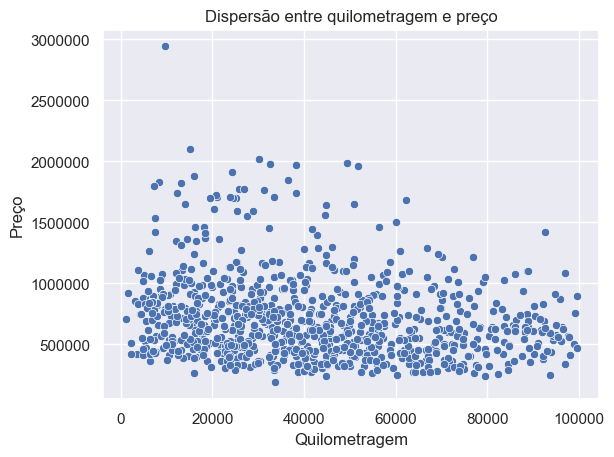

In [13]:
plot = sns.scatterplot(data=df, x='quilometragem', y='preço')
plot.title.set_text('Dispersão entre quilometragem e preço')
plot.xaxis.set_label_text('Quilometragem')
plot.yaxis.set_label_text('Preço')
plot.ticklabel_format(style='plain', axis='y')
plt.show()

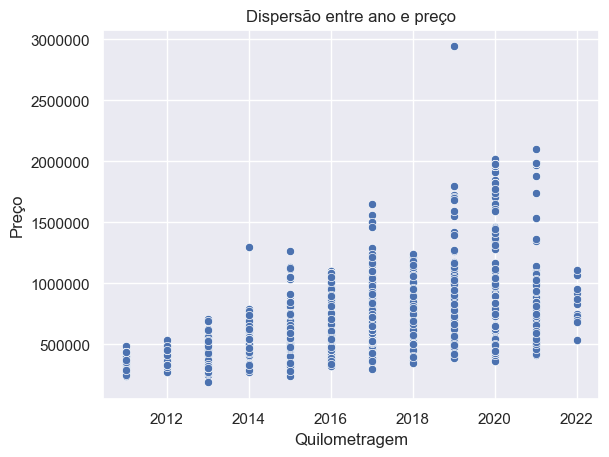

In [14]:
plot = sns.scatterplot(data=df, x='ano', y='preço')
plot.title.set_text('Dispersão entre ano e preço')
plot.xaxis.set_label_text('Quilometragem')
plot.yaxis.set_label_text('Preço')
plot.ticklabel_format(style='plain', axis='y')
plt.show()

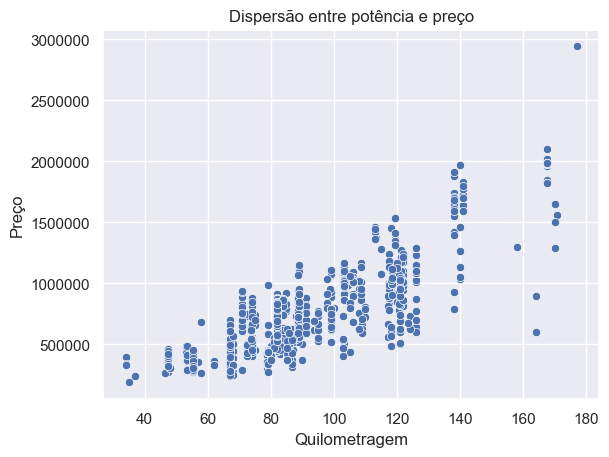

In [15]:
plot = sns.scatterplot(data=df, x='potência', y='preço')
plot.title.set_text('Dispersão entre potência e preço')
plot.xaxis.set_label_text('Quilometragem')
plot.yaxis.set_label_text('Preço')
plot.ticklabel_format(style='plain', axis='y')
plt.show()

### Séries Temporais

são dados que variam com o tempo.
Por exemplo, podemos ver o preço médio dos carros ao longo dos anos.


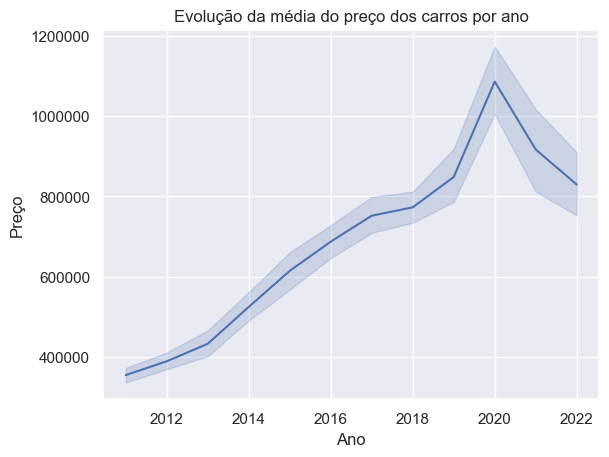

In [16]:
mean = df.groupby('ano')['preço'].mean()
plot = sns.lineplot(data=df, x='ano', y='preço')
plot.title.set_text('Evolução da média do preço dos carros por ano')
plot.xaxis.set_label_text('Ano')
plot.yaxis.set_label_text('Preço')
plot.ticklabel_format(style='plain', axis='y')
plt.show()

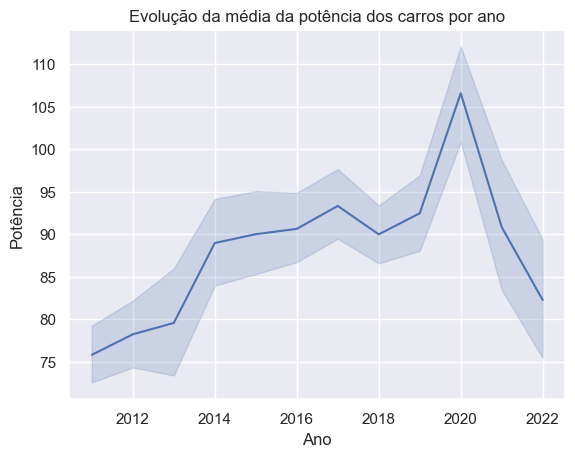

In [17]:
mean = df.groupby('ano')['potência'].mean()
plot = sns.lineplot(data=df, x='ano', y='potência')
plot.title.set_text('Evolução da média da potência dos carros por ano')
plot.xaxis.set_label_text('Ano')
plot.yaxis.set_label_text('Potência')
plot.ticklabel_format(style='plain', axis='y')
plt.show()